# Лабораторная работа №4
## Выполнил студент группы БВТ2005 Тимошин Алексей Витальевич

Реализовать следующие структуры данных:
  
● <b> Стек (stack): </b>  
Операции для стека: 
<i> инициализация, проверка на пустоту, добавление нового элемента в начало, извлечение элемента из начала;  </i>  
  
● <b> Дек (двусторонняя очередь, deque):  </b>  
Операции для дека: 
<i> инициализация, проверка на пустоту, добавление нового элемента в начало, добавление нового элемента в конец, извлечение элемента из начала, извлечение элемента из конца. </i>  
  
<i> Разработать программу обработки данных, содержащихся в заранее подготовленном txt-файле, в соответствии с заданиями, применив указанную в задании структуру данных. Результат работы программы вывести на экран и сохранить в отдельном txt-файле. </i>

# Реализация структур:

In [1]:
class stack():
    def __init__(self, data = []):
        self.stack = data
    def is_empty(self):
        return False if len(self.stack) else True
    def append(self, item):
        self.stack.append(item)
    def pop(self):
        return self.stack.pop()
    def __str__(self):
        result = ""
        for el in self.stack:
            result += str(el) + " "
        return "[" + result[:-1] + "]"

class deque():
    def __init__(self, data = []):
        self.deque = data
    def is_empty(self):
        return False if len(self.deque) else True
    def append_l(self, item):
        self.deque.insert(0, item)
    def append_r(self, item):
        self.deque.append(item)
    def pop_l(self):
        return self.deque.pop(0)
    def pop_r(self):
        return self.deque.pop()
    def __str__(self):
        result = ""
        for el in self.deque:
            result += str(el) + " "
        return "[" + result[:-1] + "]"

### Задание №1
Отсортировать строки файла, содержащие названия книг, в алфавитном порядке с использованием двух деков.

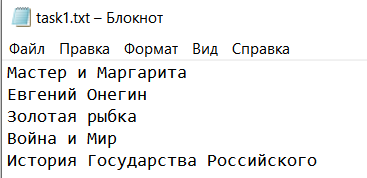

In [2]:
def func(data):
    deq1 = deque([])
    deq2 = deque([])
    if len(data) == 0:
        return []
    deq1.append_l(data[0])
    for i in range(1, len(data)):
        temp1 = deq1.pop_l()
        if data[i] <= temp1:
            deq1.append_l(temp1)
            deq1.append_l(data[i])
            continue
        deq1.append_l(temp1)
        temp2 = deq1.pop_r()
        if data[i] >= temp2:
            deq1.append_r(temp2)
            deq1.append_r(data[i])
            continue
        deq1.append_r(temp2)
        temp = deq1.pop_l()
        while data[i] >= temp:
            deq2.append_r(temp)
            temp = deq1.pop_l()
        deq1.append_l(temp)
        deq1.append_l(data[i])
        while deq2.is_empty() is False:
            deq1.append_l(deq2.pop_r())
    return deq1.deque

try:
    with open("task1.txt", "r", encoding = "utf-8") as file:
        temp = []
        for line in file:
            temp.append(line)
        temp[-1] += "\n"
        result = func(temp)
except FileNotFoundError:
    print("Файл не найден")
try:
    with open("out1.txt", "w", encoding = "utf-8") as file:
        file.writelines(result)
except:
    print("Что-то поломалось")

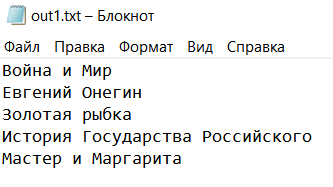

### Задание №2
Дек содержит последовательность символов для шифровки сообщений. Дан текстовый файл, содержащий зашифрованное сообщение. Пользуясь деком, расшифровать текст. 
Известно, что при шифровке каждый символ сообщения заменялся следующим за ним в деке по часовой стрелке через один.

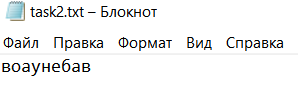

In [3]:
deq = deque(['а', 'в', 'х', 'у', 'р', 'п', 'н', 'е', 'б', 'о'])
def func(data):
    result = ""
    for el in data:
        temp_stack = stack([])
        temp = deq.pop_l()
        i = 1
        while el != temp:
            temp_stack.append(temp)
            temp = deq.pop_l()       
        if temp_stack.is_empty():
            deq.append_l(temp)
            temp_stack.append(deq.pop_r())
            temp = deq.pop_r()
            result += temp
            deq.append_r(temp)
            deq.append_r(temp_stack.pop())
        elif len(temp_stack.stack) == 1:
            deq.append_l(temp)
            deq.append_l(temp_stack.pop())
            temp = deq.pop_r()
            result += temp
            deq.append_r(temp)
        else:
            deq.append_l(temp)
            temp2 = temp_stack.pop()
            temp = temp_stack.pop()
            result += temp
            deq.append_l(temp2)
            deq.append_l(temp)
            while temp_stack.is_empty() is False:
                deq.append_l(temp_stack.pop())
    return result

result = []
try:
    with open("task2.txt", "r", encoding = "utf-8") as file:
        for line in file:
            result.append(func(line))
            
except FileNotFoundError:
    print("Файл не найден")

try:
    with open("out2.txt", "w", encoding = "utf-8") as file:
        for line in result:
            file.write(line)
except:
    print("Что-то поломалось")

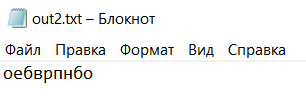

### Задание №3
Даны три стержня и n дисков различного размера. Диски можно надевать на стержни, образуя из них башни. Перенести n дисков со стержня А на стержень С, сохранив их первоначальный порядок. При переносе дисков необходимо соблюдать следующие правила:
- на каждом шаге со стержня на стержень переносить только один диск;
- диск нельзя помещать на диск меньшего размера;
- для промежуточного хранения можно использовать стержень В.
Реализовать алгоритм, используя три стека вместо стержней А, В, С. Информация о дисках хранится в исходном файле.

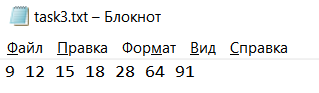

In [4]:
rods = {1 : stack([]), 2 : stack([]), 3 : stack([])}
def func(data):
    rods[1] = stack(data)
    solve(len(rods[1].stack), 1, 3)
def solve(n, i, k):
    if n == 1:
        print(f"Переложить из {i} в {k}")
        rods[k].append(rods[i].pop())
    else:
        solve(n - 1, i, 6 - i - k)
        print(f"Переложить из {i} в {k}")
        rods[k].append(rods[i].pop())
        solve(n - 1, 6 - i - k, k)
try:
    with open("task3.txt", "r", encoding = "utf-8") as file:
        line = file.readline()
        func(line.split(" "))
except FileNotFoundError:
    print("Файл не найден")
try:
    with open("out3.txt", "w", encoding = "utf-8") as file:
        file.write(" ".join(rods[3].stack))
except:
    print("Что-то поломалось")

Переложить из 1 в 3
Переложить из 1 в 2
Переложить из 3 в 2
Переложить из 1 в 3
Переложить из 2 в 1
Переложить из 2 в 3
Переложить из 1 в 3
Переложить из 1 в 2
Переложить из 3 в 2
Переложить из 3 в 1
Переложить из 2 в 1
Переложить из 3 в 2
Переложить из 1 в 3
Переложить из 1 в 2
Переложить из 3 в 2
Переложить из 1 в 3
Переложить из 2 в 1
Переложить из 2 в 3
Переложить из 1 в 3
Переложить из 2 в 1
Переложить из 3 в 2
Переложить из 3 в 1
Переложить из 2 в 1
Переложить из 2 в 3
Переложить из 1 в 3
Переложить из 1 в 2
Переложить из 3 в 2
Переложить из 1 в 3
Переложить из 2 в 1
Переложить из 2 в 3
Переложить из 1 в 3
Переложить из 1 в 2
Переложить из 3 в 2
Переложить из 3 в 1
Переложить из 2 в 1
Переложить из 3 в 2
Переложить из 1 в 3
Переложить из 1 в 2
Переложить из 3 в 2
Переложить из 3 в 1
Переложить из 2 в 1
Переложить из 2 в 3
Переложить из 1 в 3
Переложить из 2 в 1
Переложить из 3 в 2
Переложить из 3 в 1
Переложить из 2 в 1
Переложить из 3 в 2
Переложить из 1 в 3
Переложить из 1 в 2


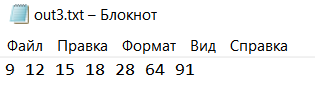

### Задание №4
Дан текстовый файл с программой на алгоритмическом языке. За один просмотр файла проверить баланс круглых скобок в тексте, используя стек.

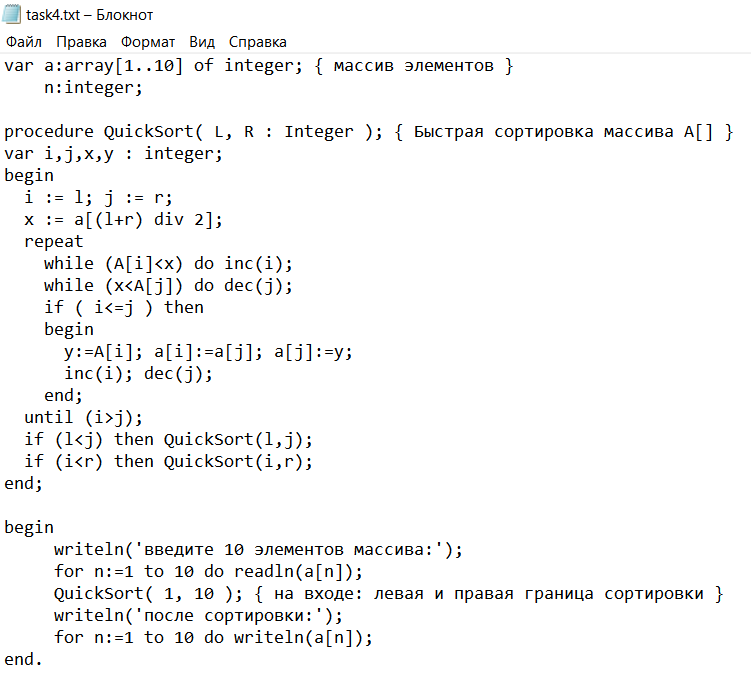

In [5]:
def func(): 
    try:
        with open("task4.txt", "r", encoding = "utf-8") as file:
            st = stack()
            for line in file:
                for el in line:
                    if el == '(':
                        st.append(el)
                    elif el == ')':
                        if st.is_empty():
                            return False
                        else:
                            st.pop()
    except FileNotFoundError:
        print("Файл не найден")
    return True if st.is_empty() else False

try:
    with open("out4.txt", "w", encoding = "utf-8") as file:
        file.write(str(func()))
except:
    ("Что-то поломалось")

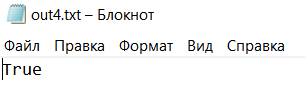

### Задание №5
Дан текстовый файл с программой на алгоритмическом языке. За один просмотр файла проверить баланс квадратных скобок в тексте, используя дек.

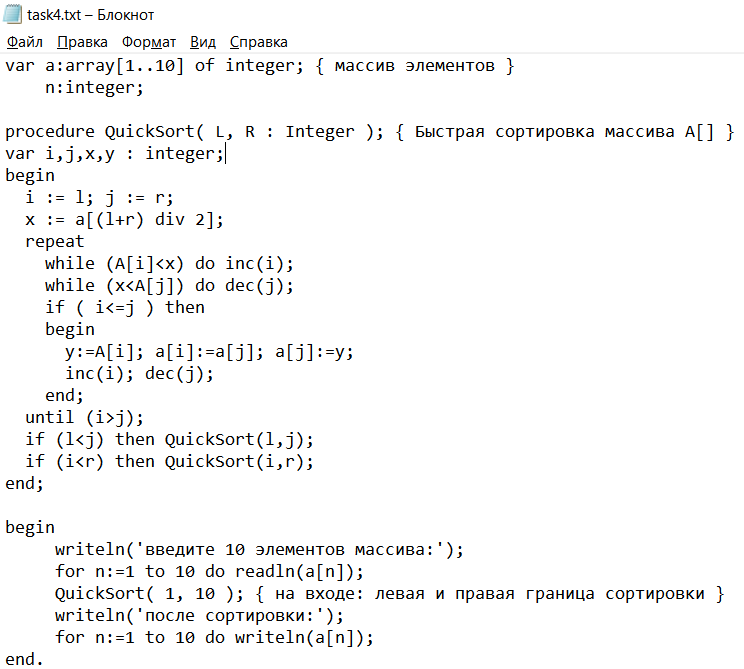

In [6]:
def func(): 
    try:
        with open("task4.txt", "r", encoding = "utf-8") as file:
            deq = deque()
            for line in file:
                for el in line:
                    if el == '[':
                        deq.append_r(el)
                    elif el == ']':
                        if deq.is_empty():
                            return False
                        else:
                            deq.pop_r()
    except FileNotFoundError:
        print("Файл не найден")
    return True if deq.is_empty() else False

try:
    with open("out5.txt", "w", encoding = "utf-8") as file:
        file.write(str(func()))
except:
    print("Что-то поломалось")

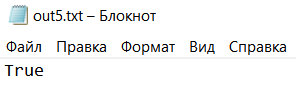

### Задание №6
Дан файл из символов. Используя стек, за один просмотр файла напечатать сначала все цифры, затем все буквы, и, наконец, все остальные символы, сохраняя исходный порядок в каждой группе символов.

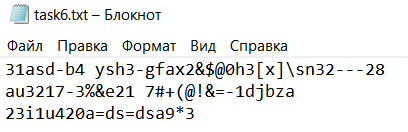

In [7]:
try:
    with open("task6.txt", "r", encoding = "utf-8") as file:
        numbers = stack()
        letters = stack()
        others = stack()
        for line in file:
            for el in line:
                if el.isdigit():
                    numbers.append(el)
                elif el.isalpha():
                    letters.append(el)
                else:
                    others.append(el)
except FileNotFoundError:
    print("Файл не найден")
try:
    with open("out6.txt", "w", encoding = "utf-8") as file:
        temp1 = ""
        temp2 = ""
        temp3 = ""
        while numbers.is_empty() is False:
            temp1 += numbers.pop()
        while letters.is_empty() is False:
            temp2 += letters.pop()
        while others.is_empty() is False:
            temp3 += others.pop()
        file.write(temp1[::-1] + temp2[::-1] + temp3[::-1])
except:
    print("Что-то поломалось")

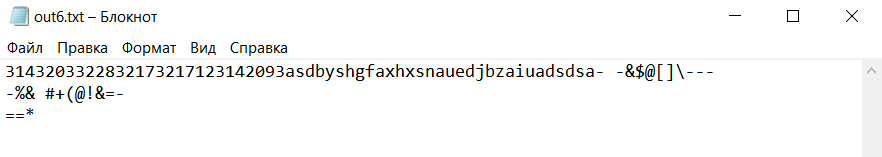

### Задание №7
Дан файл из целых чисел. Используя дек, за один просмотр файла напечатать сначала все отрицательные числа, затем все положительные числа, сохраняя исходный порядок в каждой группе.

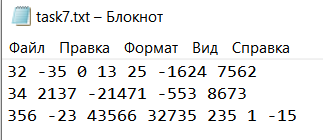

In [8]:
try:
    with open("task7.txt", "r", encoding = "utf-8") as file:
        deq = deque()
        for line in file:
            temp = line.split(" ")
            for el in temp:
                if int(el) < 0:
                    deq.append_l(int(el))
                else:
                    deq.append_r(int(el))
except FileNotFoundError:
    print("Файл не найден")
try:
    with open("out7.txt", "w", encoding = "utf-8") as file:
        temp = ""
        while deq.is_empty() is False:
            temp += str(deq.pop_l()) + " "
        file.write(temp)
except:
    print("Что-то поломалось")

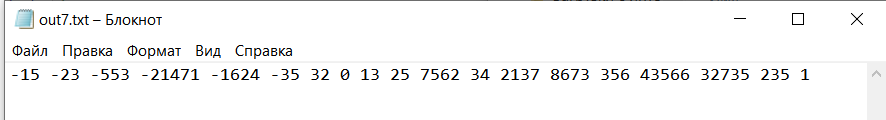

### Задание №8
Дан текстовый файл. Используя стек, сформировать новый текстовый файл, содержащий строки исходного файла, записанные в обратном порядке: первая строка становится последней, вторая – предпоследней и т.д.

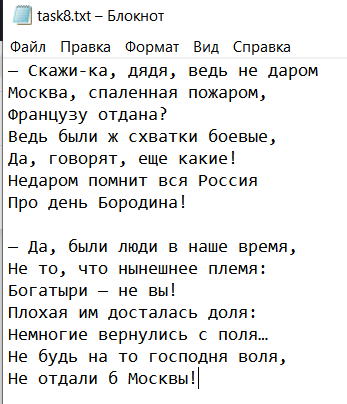

In [9]:
try:
    with open("task8.txt", "r", encoding = "utf-8") as file:
        st = stack()
        for line in file:
            st.append(line)
        if st.is_empty() is False:
            temp = st.pop()
            temp += "\n"
            st.append(temp)
except FileNotFoundError:
    print("Файл не найден")
try:
    with open("out8.txt", "w", encoding = "utf-8") as file:
        while st.is_empty() is False:
            file.write(st.pop())
except:
    print("Что-то поломалось")

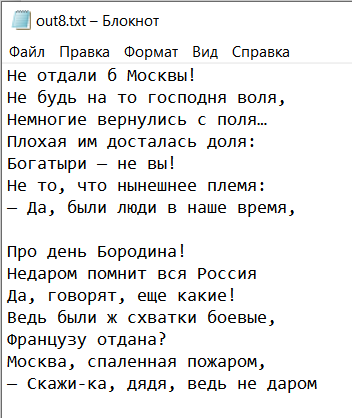

### Вывод
